In [1]:
import cv2
import torch
import ipywidgets as widgets
from IPython.display import display
from io import BytesIO
from PIL import Image

In [2]:
# Загружаем предобученную модель YOLOv5
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\Сергей/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-16 Python-3.11.2 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
def detect_objects(image_path):
    # Загружаем изображение
    img = cv2.imread(image_path)

    # Проводим детекцию объектов на изображении
    results = model(img)

    # Выводим результаты
    results.show()

In [4]:
def detect_objects_webcam():
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()

        # Проводим детекцию объектов на кадре
        results = model(frame)

        # Выводим результаты
        results.show()

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [5]:
def on_image_upload(change):
    img = Image.open(BytesIO(change['new']['content']))
    img.save('uploaded_image.jpg')
    detect_objects('uploaded_image.jpg')

In [6]:
def on_webcam_button_click(change):
    detect_objects_webcam()

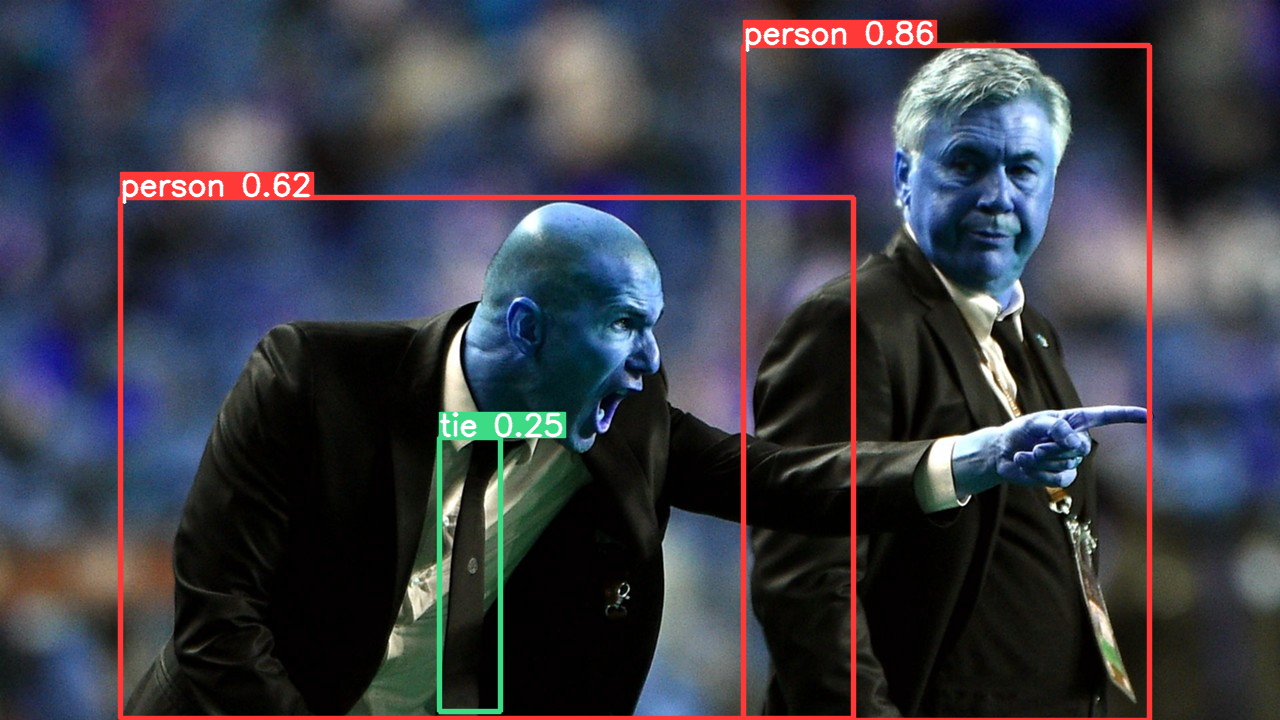

In [7]:
detect_objects('zidane.jpg')

In [8]:
# Создаем виджеты
image_upload = widgets.FileUpload(accept='image/*', description='Upload Image')
webcam_button = widgets.Button(description='Detect Objects from Webcam')

In [9]:
# Назначаем обработчики событий
image_upload.observe(on_image_upload, names='value')
webcam_button.on_click(on_webcam_button_click)

In [10]:
# Отображаем виджеты
display(image_upload)
display(webcam_button)

FileUpload(value=(), accept='image/*', description='Upload Image')

Button(description='Detect Objects from Webcam', style=ButtonStyle())